In [1]:
import pandas as pd 

In [12]:
tracks = pd.read_csv('SpotGenTrack/Data Sources/spotify_tracks.csv', index_col = 0)
albums = pd.read_csv('SpotGenTrack/Data Sources/spotify_albums.csv', index_col = 0)
artists = pd.read_csv('SpotGenTrack/Data Sources/spotify_artists.csv', index_col = 0)

## Filter Tracks DF

In [13]:
#clean available markets column
#additional column: length lyrics?

In [14]:
tracks.columns

Index(['acousticness', 'album_id', 'analysis_url', 'artists_id',
       'available_markets', 'country', 'danceability', 'disc_number',
       'duration_ms', 'energy', 'href', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'lyrics', 'mode', 'name', 'playlist',
       'popularity', 'preview_url', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'track_name_prev', 'track_number', 'uri', 'valence',
       'type'],
      dtype='object')

In [15]:
#rename id to track_id
tracks.rename(columns={'id': 'track_id_track'},inplace=True)
tracks.rename(columns={'artists_id': 'artists_id_track'},inplace=True)

In [16]:
#check for correlations of numerical features
num_attribs = tracks.select_dtypes(include=['float64', 'int64']).columns
numerical_corr_matrix = tracks[num_attribs].corr().abs()

# Display the correlations between the label (e.g., 'popularity') and other numerical columns
label_correlations = numerical_corr_matrix['popularity'].sort_values(ascending=False)
print(label_correlations)

popularity          1.000000
speechiness         0.304212
loudness            0.239679
duration_ms         0.169125
acousticness        0.154408
energy              0.153979
track_number        0.139460
time_signature      0.121505
danceability        0.092382
tempo               0.061869
liveness            0.059116
disc_number         0.047331
instrumentalness    0.041537
valence             0.034412
mode                0.010003
key                 0.000641
Name: popularity, dtype: float64


In [17]:
#check for categorical features
cat_attribs = tracks.select_dtypes(include=['object']).columns
cat_attribs

Index(['album_id', 'analysis_url', 'artists_id_track', 'available_markets',
       'country', 'href', 'track_id_track', 'lyrics', 'name', 'playlist',
       'preview_url', 'track_href', 'track_name_prev', 'uri', 'type'],
      dtype='object')

In [18]:
tracks.columns

Index(['acousticness', 'album_id', 'analysis_url', 'artists_id_track',
       'available_markets', 'country', 'danceability', 'disc_number',
       'duration_ms', 'energy', 'href', 'track_id_track', 'instrumentalness',
       'key', 'liveness', 'loudness', 'lyrics', 'mode', 'name', 'playlist',
       'popularity', 'preview_url', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'track_name_prev', 'track_number', 'uri', 'valence',
       'type'],
      dtype='object')

In [19]:
#include numerical columns with correlation greater than 0.1
include_col_tracks = ["playlist","available_markets","country","album_id","artists_id_track","track_id_track","time_signature","track_number","energy","acousticness","duration_ms","loudness","speechiness","popularity"]      

In [20]:
tracks_filtered = tracks[include_col_tracks]
tracks_filtered.columns

Index(['playlist', 'available_markets', 'country', 'album_id',
       'artists_id_track', 'track_id_track', 'time_signature', 'track_number',
       'energy', 'acousticness', 'duration_ms', 'loudness', 'speechiness',
       'popularity'],
      dtype='object')

## Filter albums DF

In [21]:
albums.columns

Index(['album_type', 'artist_id', 'available_markets', 'external_urls', 'href',
       'id', 'images', 'name', 'release_date', 'release_date_precision',
       'total_tracks', 'track_id', 'track_name_prev', 'uri', 'type'],
      dtype='object')

In [22]:
albums.rename(columns={'id': 'album_id'},inplace=True)
albums.rename(columns={'track_id': 'track_id_album'},inplace=True)
albums.rename(columns={'artist_id': 'artist_id_albums'},inplace=True)

In [23]:
albums_include = ['type','album_type', 'artist_id_albums', 'available_markets','total_tracks', 'track_id_album', 'track_name_prev','release_date',"album_id"]

In [24]:
len(albums_include)

9

In [25]:
albums_filtered = albums[albums_include]
albums_filtered.columns

Index(['type', 'album_type', 'artist_id_albums', 'available_markets',
       'total_tracks', 'track_id_album', 'track_name_prev', 'release_date',
       'album_id'],
      dtype='object')

## merge tracks and albums df 

In [26]:
albums_tracks = tracks_filtered.merge(albums_filtered,left_on="album_id",right_on="album_id",how="left")
albums_tracks.corrwith(albums_tracks["popularity"]).abs().sort_values()

C:\Users\mundt\AppData\Local\Temp\ipykernel_24152\3710334868.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  albums_tracks.corrwith(albums_tracks["popularity"]).abs().sort_values()


time_signature    0.121505
total_tracks      0.132356
track_number      0.139460
energy            0.153979
acousticness      0.154408
duration_ms       0.169125
loudness          0.239679
speechiness       0.304212
popularity        1.000000
dtype: float64

In [27]:
albums_tracks.isna().sum()

playlist               0
available_markets_x    0
country                0
album_id               0
artists_id_track       0
track_id_track         0
time_signature         0
track_number           0
energy                 0
acousticness           0
duration_ms            0
loudness               0
speechiness            0
popularity             0
type                   0
album_type             0
artist_id_albums       0
available_markets_y    0
total_tracks           0
track_id_album         0
track_name_prev        0
release_date           0
dtype: int64

In [28]:
len(albums_tracks)

101939

## Filter Artists DF

In [29]:
artists = pd.read_csv('SpotGenTrack/Data Sources/spotify_artists.csv', index_col = 0)

In [30]:
artists.columns

Index(['artist_popularity', 'followers', 'genres', 'id', 'name', 'track_id',
       'track_name_prev', 'type'],
      dtype='object')

In [31]:
artists.rename(columns={"id": "artist_id_artists"},inplace=True)
artists.rename(columns={"track_id": "track_id_artists"},inplace=True)

In [32]:
artists.columns

Index(['artist_popularity', 'followers', 'genres', 'artist_id_artists', 'name',
       'track_id_artists', 'track_name_prev', 'type'],
      dtype='object')

In [33]:
albums_tracks.columns

Index(['playlist', 'available_markets_x', 'country', 'album_id',
       'artists_id_track', 'track_id_track', 'time_signature', 'track_number',
       'energy', 'acousticness', 'duration_ms', 'loudness', 'speechiness',
       'popularity', 'type', 'album_type', 'artist_id_albums',
       'available_markets_y', 'total_tracks', 'track_id_album',
       'track_name_prev', 'release_date'],
      dtype='object')

## Merge albums, tracks, artists

In [34]:
#ARTIST_ID (album df) 

In [35]:
albums_tracks_artistis = albums_tracks.merge(artists, left_on="artist_id_albums",right_on="artist_id_artists",how="left")

In [36]:
albums_tracks_artistis.isna().sum()

playlist                 0
available_markets_x      0
country                  0
album_id                 0
artists_id_track         0
track_id_track           0
time_signature           0
track_number             0
energy                   0
acousticness             0
duration_ms              0
loudness                 0
speechiness              0
popularity               0
type_x                   0
album_type               0
artist_id_albums         0
available_markets_y      0
total_tracks             0
track_id_album           0
track_name_prev_x        0
release_date             0
artist_popularity      795
followers              795
genres                 795
artist_id_artists      795
name                   795
track_id_artists       795
track_name_prev_y      795
type_y                 795
dtype: int64

In [37]:
albums_tracks_artistis.columns

Index(['playlist', 'available_markets_x', 'country', 'album_id',
       'artists_id_track', 'track_id_track', 'time_signature', 'track_number',
       'energy', 'acousticness', 'duration_ms', 'loudness', 'speechiness',
       'popularity', 'type_x', 'album_type', 'artist_id_albums',
       'available_markets_y', 'total_tracks', 'track_id_album',
       'track_name_prev_x', 'release_date', 'artist_popularity', 'followers',
       'genres', 'artist_id_artists', 'name', 'track_id_artists',
       'track_name_prev_y', 'type_y'],
      dtype='object')

In [38]:
print("number of columns in merged: ",(len(albums_tracks_artistis.columns)))

number of columns in merged:  30


In [39]:
print("number of rows in merged: ",(len(albums_tracks_artistis)))

number of rows in merged:  101939


## Lyrics

In [40]:
lyrics_features = pd.read_csv('SpotGenTrack/Features Extracted/lyrics_features.csv', index_col = 0)

In [41]:
lyrics_features.columns

Index(['mean_syllables_word', 'mean_words_sentence', 'n_sentences', 'n_words',
       'sentence_similarity', 'track_id', 'vocabulary_wealth'],
      dtype='object')

In [42]:
albums_tracks_artistis.columns

Index(['playlist', 'available_markets_x', 'country', 'album_id',
       'artists_id_track', 'track_id_track', 'time_signature', 'track_number',
       'energy', 'acousticness', 'duration_ms', 'loudness', 'speechiness',
       'popularity', 'type_x', 'album_type', 'artist_id_albums',
       'available_markets_y', 'total_tracks', 'track_id_album',
       'track_name_prev_x', 'release_date', 'artist_popularity', 'followers',
       'genres', 'artist_id_artists', 'name', 'track_id_artists',
       'track_name_prev_y', 'type_y'],
      dtype='object')

In [43]:
albums_tracks_artistis_lyr = albums_tracks_artistis.merge(lyrics_features,left_on="track_id_track",right_on="track_id",how="left")

In [44]:
albums_tracks_artistis_lyr.isnull().sum()

playlist                  0
available_markets_x       0
country                   0
album_id                  0
artists_id_track          0
track_id_track            0
time_signature            0
track_number              0
energy                    0
acousticness              0
duration_ms               0
loudness                  0
speechiness               0
popularity                0
type_x                    0
album_type                0
artist_id_albums          0
available_markets_y       0
total_tracks              0
track_id_album            0
track_name_prev_x         0
release_date              0
artist_popularity       795
followers               795
genres                  795
artist_id_artists       795
name                    795
track_id_artists        795
track_name_prev_y       795
type_y                  795
mean_syllables_word    6985
mean_words_sentence    6985
n_sentences            6985
n_words                6985
sentence_similarity    6985
track_id            

## AUDIO

In [57]:
%store -r processed_data

no stored variable or alias processed_data


In [46]:
audio = processed_data

NameError: name 'processed_data' is not defined

In [47]:
audio.head()

NameError: name 'audio' is not defined

In [48]:
albums_tracks_artistis_lyr_audio = albums_tracks_artistis_lyr.merge(audio,left_on="track_id_track",right_on="track_id",how="left")

NameError: name 'audio' is not defined

In [49]:
albums_tracks_artistis_lyr_audio.isna().sum()

NameError: name 'albums_tracks_artistis_lyr_audio' is not defined

## ALL data DF

In [50]:
albums_tracks_artistis_lyr_audio.isna().sum().sort_values(ascending=False)[:20]

NameError: name 'albums_tracks_artistis_lyr_audio' is not defined

In [51]:
all_data = albums_tracks_artistis_lyr_audio
all_data.shape

NameError: name 'albums_tracks_artistis_lyr_audio' is not defined

In [52]:
corr_num = all_data.corrwith(all_data['popularity']).abs().sort_values(ascending=False)

NameError: name 'all_data' is not defined

In [53]:
corr_num[:10]

NameError: name 'corr_num' is not defined

## Analysis of popularity

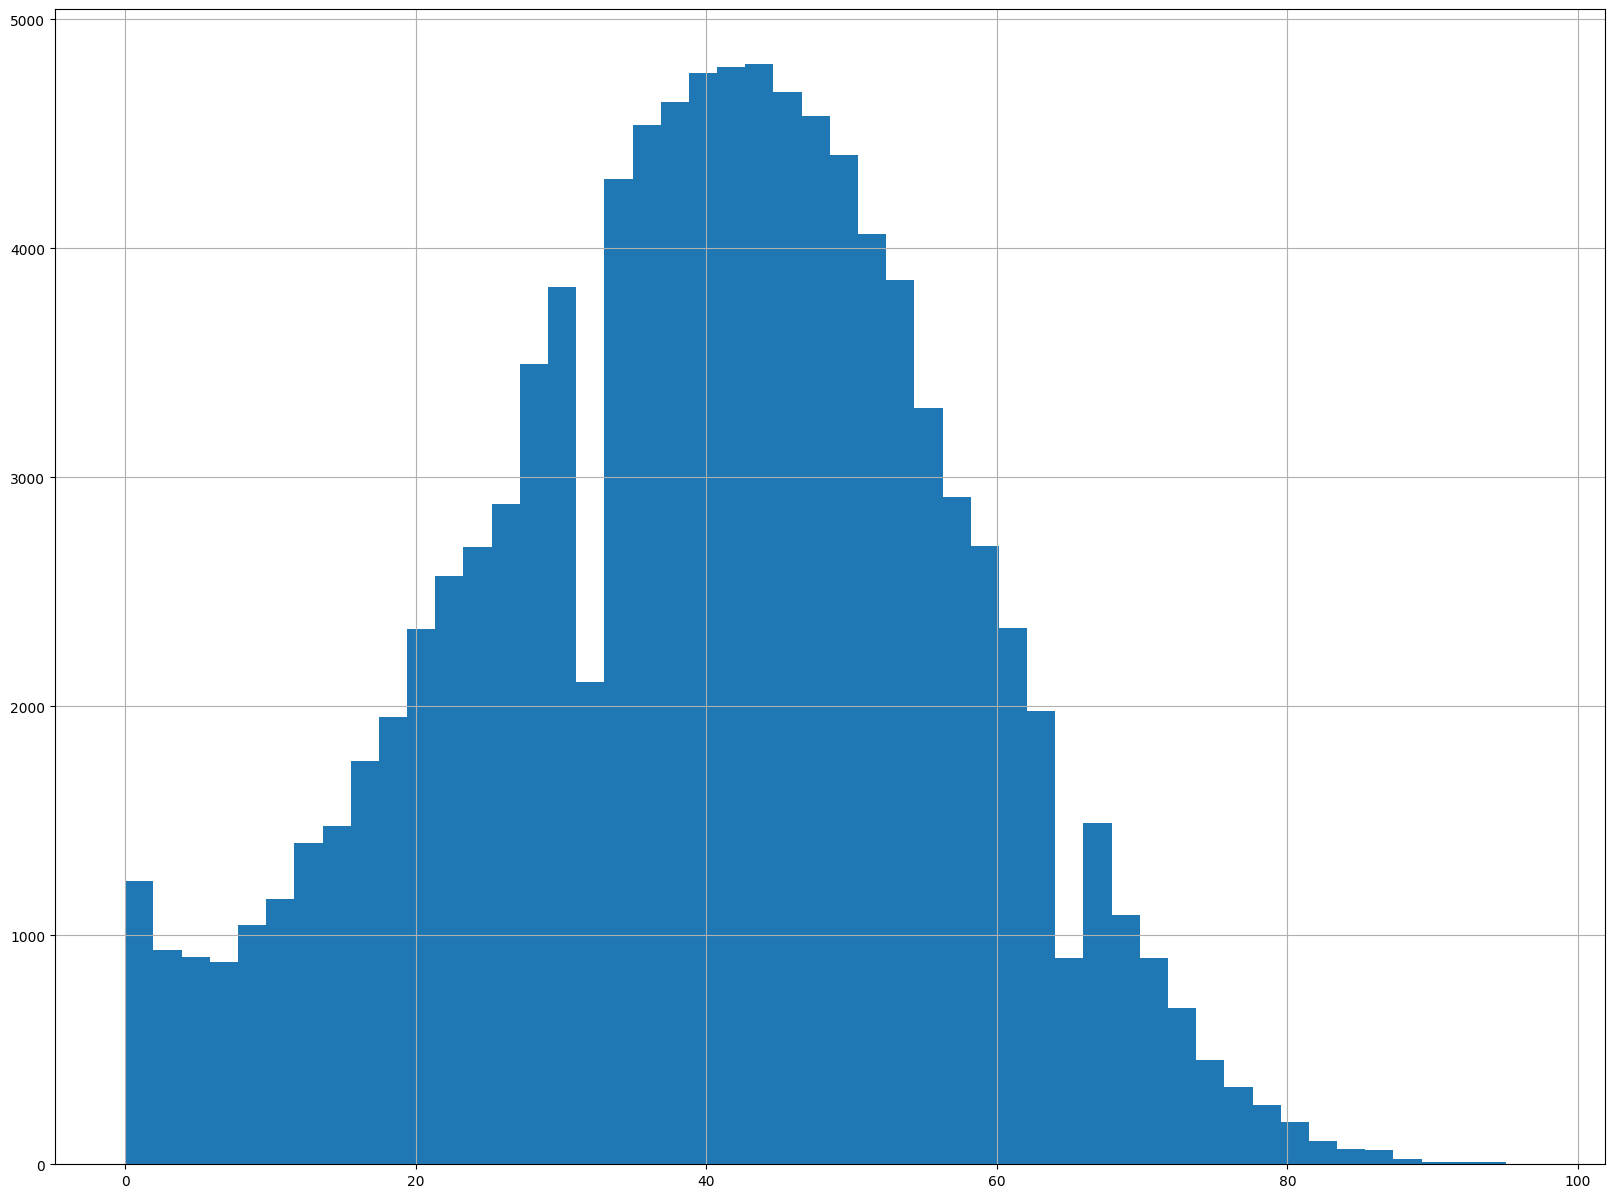

In [54]:
import matplotlib.pyplot as plt


tracks["popularity"].hist(bins=50, figsize=(20,15))

plt.show()

In [55]:
tracks.sort_values(by="popularity",ascending=False)["name"][:20]

90024                                       Calma - Remix
101706                                   Sweet but Psycho
100168                            Going Bad (feat. Drake)
100625                                               Talk
94579                                     i'm so tired...
101732                                  MIA (feat. Drake)
94452                                          High Hopes
89186                         Giant (with Rag'n'Bone Man)
100383                                         Adan y Eva
89648                                   Baila Baila Baila
86219                                   Murder On My Mind
91256                                          SICKO MODE
92713                                  Let Me Down Slowly
92734                                           Please Me
93924                  ZEZE (feat. Travis Scott & Offset)
93012                                               a lot
74129                                            Thotiana
90029         

In [56]:
#outliers in label
from scipy.stats import zscore
z_scores = zscore(all_data_sources['popularity'])
potential_outliers = all_data_sources[(z_scores > 3) | (z_scores < -3)]
potential_outliers[["name_track","popularity"]]

NameError: name 'all_data_sources' is not defined

## prepro pipeline

#notes for pipeline:
- train model with train data 
- Include categorical columns of track df
- Include hanna’s version of audio features df 
- Drop track id before transforming
- After scaling correlations super low- Imputer strategy for artist_popularity 


In [ ]:
all_data.shape

In [ ]:
all_data.columns

In [ ]:
duplicate_columns = all_data.columns[all_data.columns.duplicated()]

In [ ]:
duplicate_columns

## Dropping columns

In [ ]:
drop_all = ["name","track_id_track","track_id_y","artist_id", "track_id_x", "release_date", "id", "album_id", "artists_id","track_id"]  

In [ ]:
all_data = all_data.drop(columns=drop_all)

In [ ]:
all_data.shape

In [ ]:
all_data.columns

In [ ]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

In [ ]:
#define features and labels 
X = all_data.drop(columns=["popularity"])
y = all_data["popularity"]

In [ ]:
#train test split 
train_data, test_data = train_test_split(all_data, test_size=0.2, random_state=42)

In [ ]:
train_data.shape

In [ ]:
train_data.corr().sort_values(by="popularity",ascending=False)["popularity"]

In [ ]:
train_data.dtypes

In [ ]:
train_data.columns

In [59]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names]

    
def get_preprocessor(data):
    
    num_attribs = data.select_dtypes(include=['float64', 'int64']).columns
    cat_attribs = data.select_dtypes(include=['object']).columns
    
    num_pipeline = Pipeline([
            ('selector', DataFrameSelector(num_attribs)),
            ('imputer', SimpleImputer(strategy="median")),
            ('std_scaler', StandardScaler()),
        ])
    
    cat_pipeline = Pipeline([
            ('selector', DataFrameSelector(cat_attribs)),
            ('cat_encoder', OneHotEncoder(sparse=False)),
        ])
    
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])
    
    return full_pipeline

def create_prepared_dataframe(data, preprocessor):
    # Get the transformed column names
    transformed_num_cols = preprocessor.transformers_[0][2].tolist()
    transformed_cat_cols = list(preprocessor.named_transformers_['cat']['cat_encoder'].get_feature_names_out(cat_attribs))

    # Combine the transformed column names
    transformed_cols = transformed_num_cols + transformed_cat_cols

    # Create a DataFrame with the transformed data and column names
    data_prepared = pd.DataFrame(data, columns=transformed_cols)

    return data_prepared

preprocessor = get_preprocessor(train_data)
data_prepared_array = preprocessor.fit_transform(train_data[:500])

# Create a DataFrame with original column names
data_prepared_df = create_prepared_dataframe(data_prepared_array, preprocessor)

NameError: name 'BaseEstimator' is not defined

In [ ]:
data_prepared_df.corr()["popularity"].sort_values(ascending=False)

In [ ]:
preprocessor = get_preprocessor(train_data)

In [ ]:
type(preprocessor)

In [ ]:
preprocessor = get_preprocessor(train_data)

data_prepared = preprocessor.fit_transform(train_data[:500])
#for x in data_prepared:
#    print(len(x))
#now 4700 columns

In [ ]:
data_prepared.shape

## Check for correlations with (encoded) features

In [ ]:
# Get the original column names
num_attribs = list(all_data.select_dtypes(include=['float64', 'int64']).columns)
cat_attribs = list(all_data.select_dtypes(include=['object']).columns)

# Get the transformed column names
transformed_num_cols = preprocessor.transformers_[0][2].tolist()
transformed_cat_cols = list(preprocessor.named_transformers_['cat']['cat_encoder'].get_feature_names_out(cat_attribs
                                                                                                        ))

# Create a mapping of transformed column names to original column names
transformed_cols = transformed_num_cols + transformed_cat_cols
orig_cols_expanded = []

for col in all_data.columns:
    if col in cat_attribs:
        one_hot_cols = [t_col for t_col in transformed_cat_cols if t_col.startswith(col + "_")]
        orig_cols_expanded.extend([col] * len(one_hot_cols))
    else:
        orig_cols_expanded.append(col)

col_mapping = dict(zip(transformed_cols, orig_cols_expanded))

# Create the correlation matrix
corr_matrix = pd.DataFrame(data_prepared, columns=transformed_cols).corr()

# Rename the columns of the correlation matrix using the original column names
corr_matrix.rename(columns=col_mapping, index=col_mapping, inplace=True)

# Print the correlation matrix
print(corr_matrix)

In [ ]:
corr_matrix["popularity"].abs().sort_values(ascending=False)[:20]

In [ ]:
# This correlation is super low?? I think the imputing fucked up the correlations, we need to check
corr_matrix.loc['popularity', 'artist_popularity']

In [ ]:
from scipy.stats import pointbiserialr

cat_data = train_data.select_dtypes(include=['object'])

# Calculate point-biserial correlation coefficients for each categorical feature
for col in cat_data.columns:
    # One-hot encode the categorical feature
    one_hot = pd.get_dummies(train_data[col], prefix=col)
    
    # Calculate the point-biserial correlation coefficient for each encoded category
    for one_hot_col in one_hot.columns: 
        coef, p_value = pointbiserialr(train_data['popularity'], one_hot[one_hot_col])
        print(f"Point-biserial correlation between {one_hot_col} and popularity: {coef:.4f} (p-value: {p_value:.4f})")